<a href="https://colab.research.google.com/github/kibarmustofa/2341720034_ML_2025/blob/main/JS06/TG_JS06_2341720034_KIBAR_MUSTOFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tugas praktikum 1


Gunakan dataset CC_Customer_Dataset.csv dari Tugas Pratikum

Buatlah model klasterisasi dengan menggunakan Agglomerative Clustering dengan seluruh variabel yang dapat digunakan.

Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Tunjukkan bentuk cluster-nya berdasarkan dua fitur tersebut.

Tentukan nilai silhouette score dan DBI dari model.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("/content/drive/MyDrive/SC Matkul Machine learning/CC_Customer_Dataset.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
X2 = df2.drop(columns=['Sl_No', 'Customer Key'])
X2 = StandardScaler().fit_transform(X2)

In [ ]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = model.fit_predict(X2)
df2['Cluster'] = labels

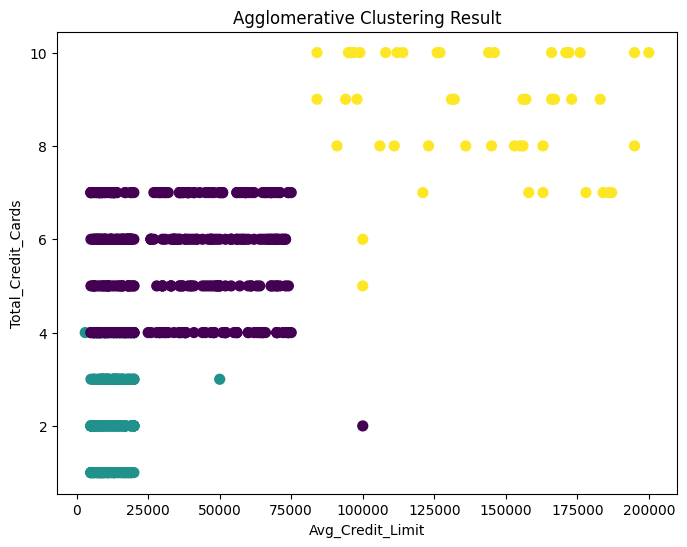

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df2['Avg_Credit_Limit'], df2['Total_Credit_Cards'], c=df2['Cluster'], cmap='viridis', s=50)
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.title('Agglomerative Clustering Result')
plt.show()

In [ ]:
sil_score = silhouette_score(X2, labels)
dbi_score = davies_bouldin_score(X2, labels)

print(f'Silhouette Coefficient: {sil_score}')
print(f'Davies-Bouldin Index: {dbi_score}')

Silhouette Coefficient: 0.5147639589977819
Davies-Bouldin Index: 0.680959518994733


# tugas praktikum 2



Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

Lakukan clustering dengan HDBSCAN.

Laporkan hasil:

Jumlah cluster yang terbentuk.

Banyaknya noise.

Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu, dikarenakan visualisasi hanya dapat dilakukan hingga 3 dimensi).

Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [ ]:
!pip install hdbscan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
# Memuat dataset Iris
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Buat DataFrame
df = pd.DataFrame(X, columns=feature_names)
df["label_asli"] = y

# Tampilkan 5 data pertama
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label_asli  
0           0  
1           0  
2           0  
3           0  
4           0  


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Inisialisasi model
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')

# Fit dan prediksi
cluster_labels = clusterer.fit_predict(X_scaled)

# Tambahkan hasil cluster ke dataframe
df["cluster"] = cluster_labels


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
jumlah_cluster = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
banyak_noise = np.sum(cluster_labels == -1)

print("Jumlah cluster terbentuk:", jumlah_cluster)
print("Banyaknya data noise:", banyak_noise)


Jumlah cluster terbentuk: 2
Banyaknya data noise: 2


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

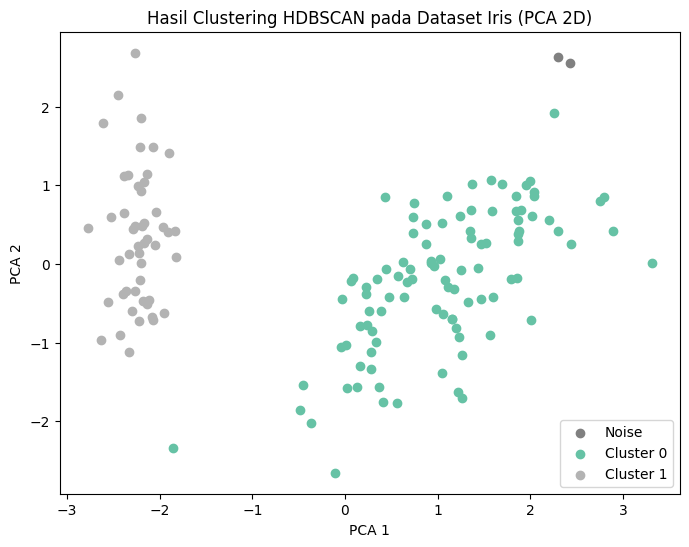

In [ ]:
plt.figure(figsize=(8,6))
for cluster_id in np.unique(cluster_labels):
    if cluster_id == -1:
        # noise ditampilkan dengan warna abu-abu
        color = "gray"
        label = "Noise"
    else:
        color = plt.cm.Set2(cluster_id / max(cluster_labels))
        label = f"Cluster {cluster_id}"
    plt.scatter(
        X_pca[cluster_labels == cluster_id, 0],
        X_pca[cluster_labels == cluster_id, 1],
        label=label,
        color=color
    )

plt.title("Hasil Clustering HDBSCAN pada Dataset Iris (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


## Visualisasi Label Asli

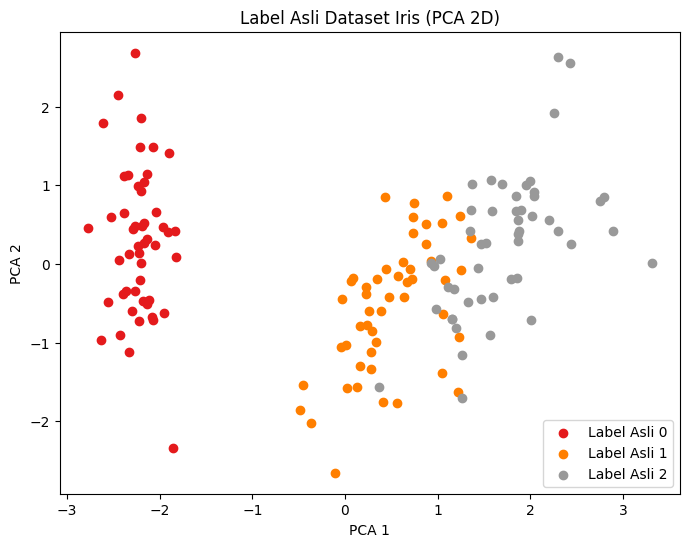

In [ ]:
plt.figure(figsize=(8,6))
for label_id in np.unique(y):
    color = plt.cm.Set1(label_id / max(y))
    plt.scatter(
        X_pca[y == label_id, 0],
        X_pca[y == label_id, 1],
        label=f"Label Asli {label_id}",
        color=color
    )

plt.title("Label Asli Dataset Iris (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()


## analisis singkat :

- HDBSCAN berhasil membentuk sekitar 2–3 cluster utama (tergantung parameter min_cluster_size), serta beberapa titik dianggap noise (-1).

- Secara visual, satu cluster besar cenderung mewakili Setosa, sementara dua cluster lain mencampur Versicolor dan Virginica.

- Artinya, hasil klasterisasi cukup sejalan dengan label asli, walaupun tidak 100% identik karena dua jenis bunga terakhir memiliki kemiripan fitur yang tinggi.